<a href="https://colab.research.google.com/github/snikhil17/NLP_course_Simplilearn/blob/main/Assignments/ML_Revision_2/ML_Revision_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Create a moddel that can predict the profit of the company based on company's location and its spending pattern**

## **Aquire Data**

In [35]:
!wget https://raw.githubusercontent.com/snikhil17/NLP_course_Simplilearn/main/Assignments/ML_Revision_2/50_Startups.csv

--2021-11-18 14:44:50--  https://raw.githubusercontent.com/snikhil17/NLP_course_Simplilearn/main/Assignments/ML_Revision_2/50_Startups.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2386 (2.3K) [text/plain]
Saving to: ‘50_Startups.csv.2’

50_Startups.csv.2   100%[===================>]   2.33K  --.-KB/s    in 0s      

2021-11-18 14:44:50 (36.5 MB/s) - ‘50_Startups.csv.2’ saved [2386/2386]



## **Loading Libraries**

In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

## **Loading Data**

In [37]:
df = pd.read_csv('50_Startups.csv')
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


## **Checking:**
  - Shape of Data
  - Missing Values
  - Duplicates

In [38]:
print(f"Shape of data: {df.shape}\n")
print(f"Missing Values: \n{df.isnull().sum()}\n")
print(f"duplicates ?: \n{df.duplicated().sum()}")

Shape of data: (50, 5)

Missing Values: 
R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

duplicates ?: 
0


## **Unique values of ``State`` Variable**

In [39]:
print(f"Unique Values in variable - State: \n{df.State.unique()}")

Unique Values in variable - State: 
['New York' 'California' 'Florida']


### **Observations:**
---
- No Missing values, No Duplicates
- **Target variable: Profit** i.e. **Continuous numeric.** Hence, **regression problem**
- One categorical variable i.e. State, which has 3 unique values that mean cardinality is low and hence we can use one hot encoding to take care of categorical data. 


## **Checking Outliers**

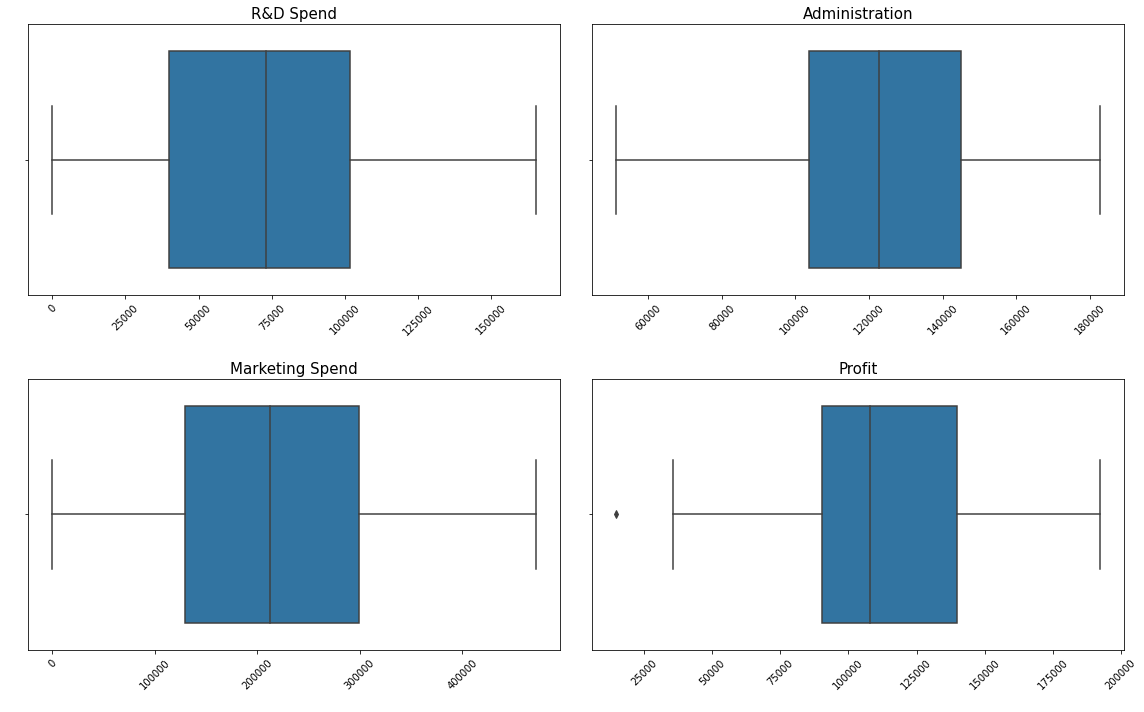

In [40]:
numerical_cols = ['R&D Spend',	'Administration', 	'Marketing Spend', 'Profit']
plt.figure(figsize = (16,10))
for i,col in enumerate(numerical_cols):
  plt.subplot(2,2,i+1)
  sns.boxplot(x = col,  data = df)
  plt.xticks(rotation = 45)
  plt.title(col, fontsize = 15)
  plt.xlabel(" ")
  plt.ylabel(" ")
  plt.tight_layout()

## Observation:
---
- Profit variable has one outlier and we keep it for now and see if model can predict that data.


## **Distribution of Variables**

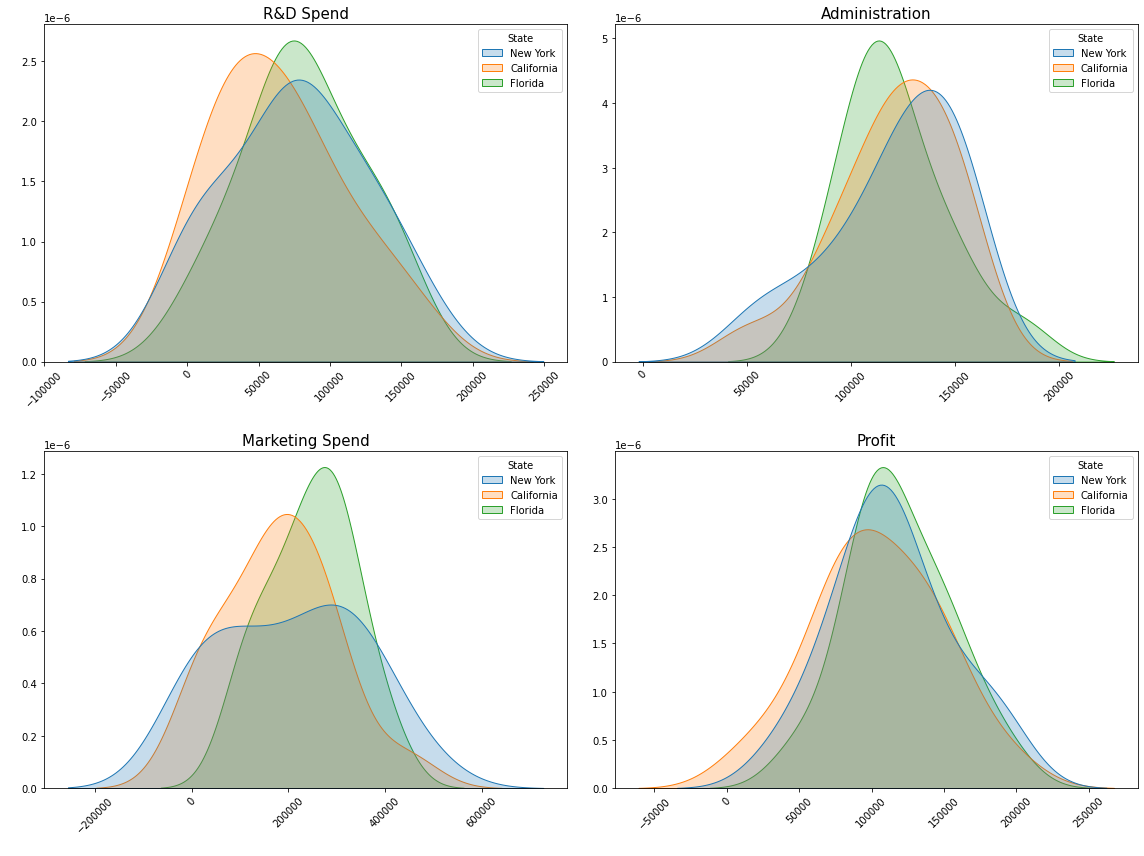

In [41]:
numerical_cols = ['R&D Spend',	'Administration', 	'Marketing Spend', 'Profit']
plt.figure(figsize = (16,12))
for i,col in enumerate(numerical_cols):
  plt.subplot(2,2,i+1)
  sns.kdeplot(x = col, data = df, hue = 'State',  shade = True)
  plt.xticks(rotation = 45)
  plt.title(col, fontsize = 15)
  plt.xlabel(" ")
  plt.ylabel(" ")
  plt.tight_layout()

### Observations:

---
- R & D Spend: All 3 states have single mode density curve, New York seen to have some values around 0 also.
- Administration: All 3 states have single mode density curve, California and New York developed a some spend values around 50000. Florida is seen to have a few values around 200000.
- Marketing Spend: California and Florida have single mode i.e. most of their spend values are found in that area. New york have bi-modal distribution, which shows that marketing spend value of New-york is around 0 and 400000. 
- Profit: All States have single mode onle. Very slight difference can be observed in profits in different states. 



## **Relationship between independent and dependent vatiables**

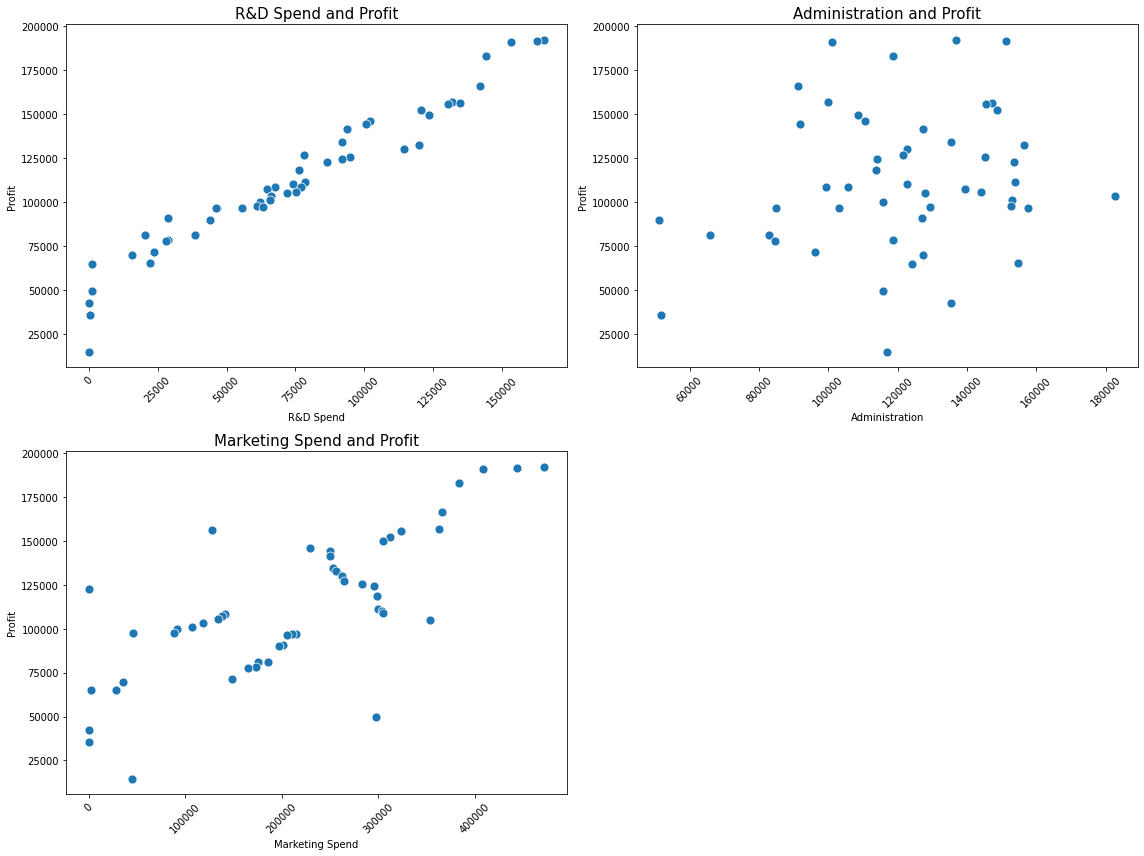

In [42]:
numerical_cols = ['R&D Spend',	'Administration', 	'Marketing Spend']
plt.figure(figsize = (16,12))
for i,col in enumerate(numerical_cols):
  plt.subplot(2,2,i+1)
  sns.scatterplot(x = col,y = 'Profit', data = df, s = 80)
  plt.xticks(rotation = 45)
  plt.title(f"{col} and Profit", fontsize = 15)
  plt.xlabel(col)
  plt.ylabel("Profit")
  plt.tight_layout()


## **Observations:** 

---
- R&D spend and Profit has Linear Relationship.
- Marketing spend and profit has slight linear relationship.
- Administration and profit doesn't have linear relationship between each other. May be with transformation we can achieve linear-relationship.



## **Correlation Matrix Heatmap**

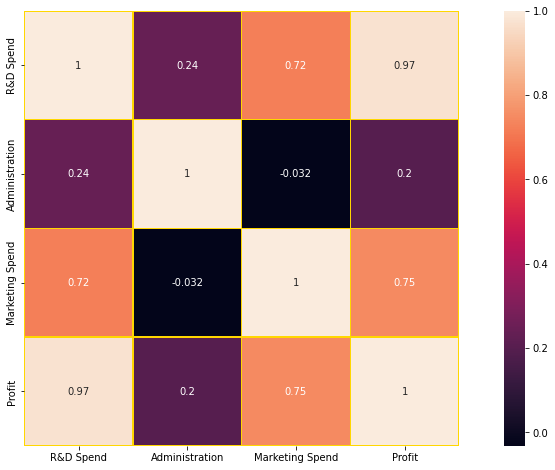

In [43]:
plt.figure(figsize = (16,8))
sns.heatmap(df.corr(), square =True, annot = True, lw=0.2, linecolor = 'gold')

## **Observations:**
- No multi-collinearity between independent variables.
- R&D Spend has highest positive correlation with Profit followed by Marketing Spend and Administration. 

## **``State`` Varaiable Bar and Count Plot**

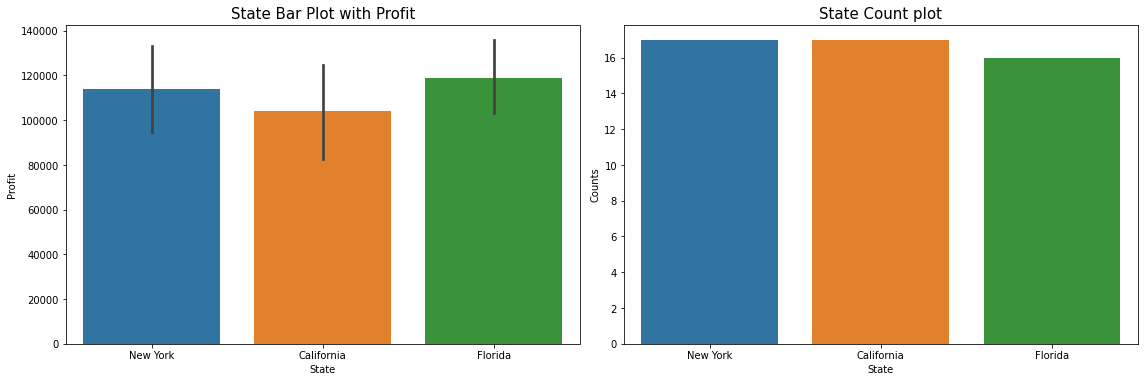

In [44]:
# Categorical Variable
plt.figure(figsize = (16,10))
plt.subplot(2,2,1)
sns.barplot(x = 'State',y = 'Profit',  data = df)
plt.title('State Bar Plot with Profit', fontsize = 15)
plt.xlabel("State")
plt.ylabel("Profit")
plt.tight_layout()

plt.subplot(2,2,2)
sns.countplot(x = 'State',  data = df)
plt.title('State Count plot', fontsize = 15)
plt.xlabel("State")
plt.ylabel("Counts")
plt.tight_layout()

## **Observations:**
- Profits in each state is not that different. Still order can be seen as Florida, New York and California.
- Even though Florida has lesser data compared to New york and California. 


## **Pre-processing Data**

In [45]:
X = df.drop('Profit', axis = 1)
Y = df['Profit']

X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state = 7)

### **train_test_split without stratify**

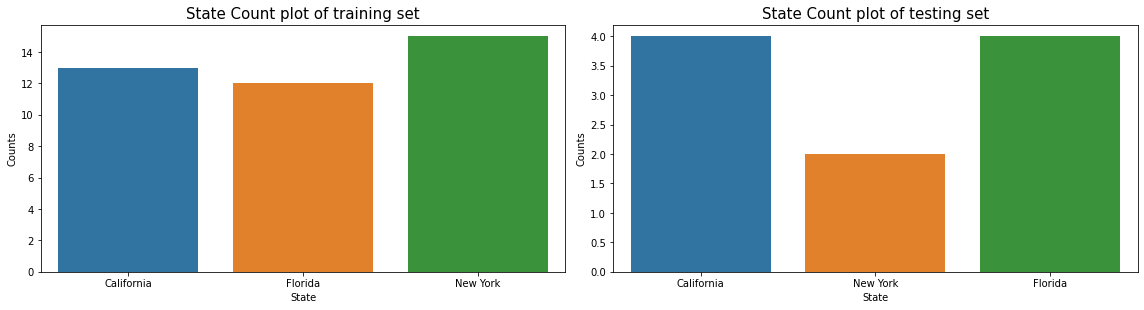

In [46]:
plt.figure(figsize = (16,8))
plt.subplot(2,2,1)
sns.countplot(x = 'State',  data = X_train)
plt.title('State Count plot of training set', fontsize = 15)
plt.xlabel("State")
plt.ylabel("Counts")
plt.tight_layout()

plt.subplot(2,2,2)
sns.countplot(x = 'State',  data = X_test)
plt.title('State Count plot of testing set', fontsize = 15)
plt.xlabel("State")
plt.ylabel("Counts")
plt.tight_layout()

### **train_test_split with stratify**

In [47]:
X = df.drop('Profit', axis = 1)
Y = df['Profit']

X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, stratify = X['State'], random_state = 7)

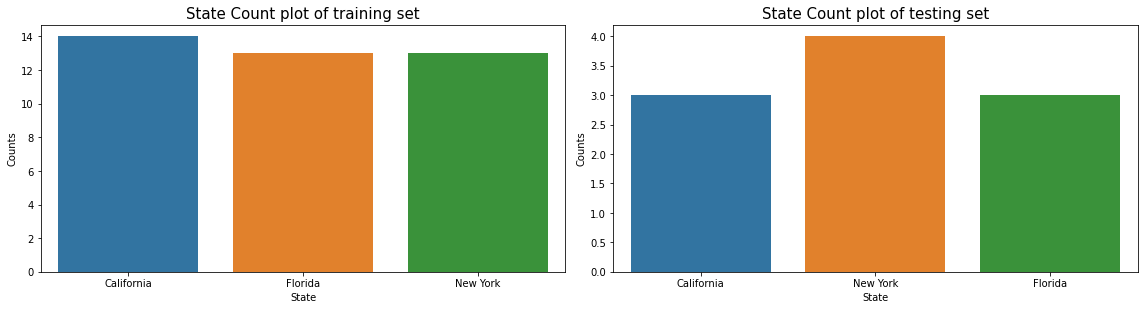

In [48]:
plt.figure(figsize = (16,8))
plt.subplot(2,2,1)
sns.countplot(x = 'State',  data = X_train)
plt.title('State Count plot of training set', fontsize = 15)
plt.xlabel("State")
plt.ylabel("Counts")
plt.tight_layout()

plt.subplot(2,2,2)
sns.countplot(x = 'State',  data = X_test)
plt.title('State Count plot of testing set', fontsize = 15)
plt.xlabel("State")
plt.ylabel("Counts")
plt.tight_layout()

## **Observation:**
- stratify gave slightly better ratio of three categories in State. Hence using stratify-train_test_split

### **log transform Target variable**

In [49]:
y_train_log = np.log(y_train)
y_test_log = np.log(y_test)

### **OHE categorical variable**

In [51]:
X_train_ohe = pd.get_dummies(X_train)
X_test_ohe = pd.get_dummies(X_test)
X_train_ohe.head()

,R&D Spend,Administration,Marketing Spend,State_California,State_Florida,State_New York
6,134615.46,147198.87,127716.82,1,0,0
4,142107.34,91391.77,366168.42,0,1,0
7,130298.13,145530.06,323876.68,0,1,0
28,66051.52,182645.56,118148.20,0,1,0
3,144372.41,118671.85,383199.62,0,0,1


### **Stardardizing Numerical columns:**

In [53]:
std = preprocessing.StandardScaler()
X_train_std = std.fit_transform(X_train_ohe)
X_test_std = std.transform(X_test_ohe)

## **Model Building**
 - **Decided SL = 0.25 Therefore, CL = 1-SL = 0.75**

In [54]:
SL = 0.25 
CL = 1- SL
rf = RandomForestRegressor(n_estimators = 10, random_state=7)
rf.fit(X_train_std,y_train_log)

print(f"Score on Training set = {rf.score(X_train_std, y_train_log)}")
print(f"Score on Testing set = {rf.score(X_test_std, y_test_log)}")
print(f"Decided CL = {CL}")


Score on Training set = 0.9479619625704884
Score on Testing set = 0.9520278573551559
Decided CL = 0.75


## **Observation:**
- Our model is generalized:
  - Score of Training set < Score of Testing set
  - Score of Testing set > Decided CL.

### **Evaluation of Model**

In [55]:
test_preds = rf.predict(X_test_std)
rmse = metrics.mean_squared_error(y_test_log, test_preds, squared=False)
mse = metrics.mean_squared_error(y_test_log, test_preds)
r_squared = metrics.r2_score(y_test_log, test_preds)

print(f"RMSE: {rmse}")
print(f"MSE: {mse}")
print(f"R-Squared: {r_squared}")

RMSE: 0.05454597353028037
MSE: 0.002975263228366047
R-Squared: 0.9520278573551559


## **Using the model for deployement**

In [110]:
print("Prediction on single rows from Test Set \n")
for i in range(0,len(X_test_ohe),2):
  query_data = X_test_ohe.iloc[i]
  std_data_query = std.transform(np.array(query_data).reshape(1,-1))
  prediction = np.exp(rf.predict(std_data_query))[0]
  print(f"\nPredicted Profit: {prediction.round(2)}")
  original_value = y_test.iloc[i]
  print(f"Original Profit: {original_value}\n")
  print("="*50)

Prediction on single rows from Test Set 


Predicted Profit: 131827.33
Original Profit: 134307.35


Predicted Profit: 114184.63
Original Profit: 118474.03


Predicted Profit: 183755.44
Original Profit: 191050.39


Predicted Profit: 123553.33
Original Profit: 108552.04


Predicted Profit: 99964.19
Original Profit: 96778.92



In [102]:
print("Out of Three States only one can be labelled as 1 and rest must be 0 \n")
R_D_Spend = float(input(f"Enter a value for R&D Spend. Range: {min(X_train_ohe['R&D Spend'])} to {max(X_train_ohe['R&D Spend'])}:  "))
Administration= float(input(f"Enter a value for R&D Spend. Range: {min(X_train_ohe['Administration'])} to {max(X_train_ohe['Administration'])}:  "))
Marketing_Spend = float(input(f"Enter a value for R&D Spend. Range: {min(X_train_ohe['Marketing Spend'])} to {max(X_train_ohe['Marketing Spend'])}:  "))
State_California = float(input(f"Enter a value for R&D Spend. Range: {min(X_train_ohe['State_California'])} or {max(X_train_ohe['State_California'])}:  "))
State_Florida  = float(input(f"Enter a value for R&D Spend. Range: {min(X_train_ohe['State_Florida'])} or {max(X_train_ohe['State_Florida'])}:  "))
State_New_York = float(input(f"Enter a value for R&D Spend. Range: {min(X_train_ohe['State_New York'])} or {max(X_train_ohe['State_New York'])}:  "))

query_data = np.array([R_D_Spend, Administration, Marketing_Spend, State_California, State_Florida, State_New_York]).reshape(1,-1)
std_data_query = std.transform(query_data)
prediction = np.exp(rf.predict(std_data_query))[0]
print(f"\nPredicted Profit: {prediction}")

Out of Three States only one can be labelled as 1 and rest must be 0 

Enter a value for R&D Spend. Range: 0.0 to 162597.7:  161000
Enter a value for R&D Spend. Range: 51283.14 to 182645.56:  182000
Enter a value for R&D Spend. Range: 0.0 to 443898.53:  443000
Enter a value for R&D Spend. Range: 0 or 1:  0
Enter a value for R&D Spend. Range: 0 or 1:  1
Enter a value for R&D Spend. Range: 0 or 1:  0

Predicted Profit: 186390.53460076876
